

# Analysis of Auto-Sklearn and CLS-Luigi Results for Binary Classification Problems

## Overview <a id=ov>
1. [Dataset Information](#ds_info)<br>
2. [Effeciency](#eff)<br>
3. [Accuracy Scores](#scores)<br>
4. [Score Distribution](#scores_dist)<br>



In [1]:

ds_in_autosklearn = [
        'spambase',
        'pc4',
        'wilt',
        'qsar-biodeg',
        'mozilla4',
        'steel-plates-fault',
        'ozone-level-8hr',
        'eeg-eye-state',
        'madelon',
    ]

dataset_names = [
        'spambase', # exists in autosklearn
        'sylvine',
        'bank-marketing',
        'phoneme',
        'kc1',  # exists in autosklearn
        'pc4', # exists in autosklearn
        'wilt', # exists in autosklearn
        'qsar-biodeg', # exists in autosklearn
        'mozilla4', # exists in autosklearn
        'steel-plates-fault', # exists in autosklearn
        'ozone-level-8hr', # exists in autosklearn
        'eeg-eye-state', # exists in autosklearn
        'madelon',
        'numerai28.6',
        'higgs',
    ]
    

ds_ids = [

        9967,  # steel-plates-fault
        9957,  # qsar-biodeg
        9952,  # phoneme
        9978,  # ozone-level-8hr
        146820,  # wilt
        3899,  # mozilla4
        9983,  # eeg-eye-state
        359962,  # kc1 classification
        359958,  # pc4 classification
        361066,  # bank-marketing classification
        359972,  # sylvin classification
        9976,  # Madelon
        167120,  # numerai28.6
        146606,  # higgs
        43,  #spambase
    ]


components = {
    "feature_preprocessor": [
        "SKLFastICA",
        "SKLFeatureAgglomeration",
        "SKLKernelPCA",
        "SKLNystroem",
        "SKLPCA",
        "SKLPolynomialFeatures",
        "SKLRandomTreesEmbedding",
        "SKLRBFSampler",
        "SKLSelectFromExtraTrees",
        "SKLSelectFromLinearSVC",
        "SKLSelectPercentile",
        "SKLSelectRates"
    ],
    "scaler":[
        "SKLMinMaxScaler",
        "SKLNormalizer",
        "SKLPowerTransformer",
        "SKLQuantileTransformer",
        "SKLRobustScaler",
        "SKLStandardScaler"
    ],
    "imputer": [
        "SKLSimpleImpute"
    ]
}

clf_short_names = {

    'SKLRandomForest': "RF",
    'SKLExtraTrees':"EXT",
    'SKLDecisionTree':"DT",
    'SKLKNearestNeighbors':"KNN",

    'SKLGradientBoosting':"GB",
    'SKLSGD': "SGD",
    'SKLAdaBoost':"ADA",

    'SKLLinearSVC':"LSVC",
    'SKLKernelSVC':"KSVC",
    
    'SKLLinearDiscriminantAnalysis':"LDA",
    'SKLQuadraticDiscriminantAnalysis':"QDA",

    'SKLPassiveAggressive':"PA",
    
    'SKLGaussianNaiveBayes':"GNB",
    'SKLMultinomialNB':"MNB",
    'SKLBernoulliNB':"BNB", 
    'SKLMultiLayerPerceptron':"MLP"
}



askl_clf_short_names = {
    'random_forest' :"RF",
    'extra_trees': "EXT",
    'decision_tree': "DT",
    'k_nearest_neighbors': "KNN",
    'gradient_boosting': "GB",
    'sgd': "SGD",
    'adaboost': "ADA",
    'liblinear_svc': "LSVC",
    'libsvm_svc': "KSVC",
    
    'lda': "LDA",
    'qda': "QDA",
    'passive_aggressive' :"PA",

    'gaussian_nb': "GNB",
    'multinomial_nb': "MNB" ,  
    'bernoulli_nb' :"BNB",

    'mlp': "MLP",

}


In [2]:
import pandas as pd
from openml import tasks
import warnings
import json 
from os.path import join as pjoin
from os import listdir
from statistics import median, geometric_mean
import pickle
import autosklearn.classification
import seaborn as sns


warnings.filterwarnings("ignore")

### 1. Dataset Information <a id=ds_info>
[back to overview](#ov)

In [3]:


def get_ds_info(ds_id):
    task = tasks.get_task(ds_id)
    
    x, _ = task.get_X_and_y(dataset_format='dataframe')    
    
    n_features = x.shape[1]
    n_instances = x.shape[0]
    ds_name = task.get_dataset().name
    url = task.openml_url
    
    return ds_name, n_features, n_instances, url


def make_datasets_df(ds_ids, in_autosklearn_list):
    data  ={
        'ds_name':[],
        'ds_id':[],
        'n_instances':[],
        'n_features':[],
        'in_autosklearn':[]
    }
    
    for ds_id in ds_ids:
        ds_name, n_features, n_instances, url = get_ds_info(ds_id)
        data['ds_id'].append( "\href" + "{" + url + "}" + "{" + str(ds_id) + "}" )
        data['ds_name'].append(ds_name)
        data['n_features'].append(n_features)
        data['n_instances'].append(n_instances)
        data['in_autosklearn'].append("X" if ds_name in in_autosklearn_list else "-")
        
        
    df = pd.DataFrame(data)
    
    df = df.rename(columns={
        'ds_id':'OpenML-ID',
        'ds_name':'Name',
        'n_features':'#Features',
        'n_instances':'#Instances', 
        'in_autosklearn':'In AutoSklearn Metadata?'})
    
    return df 


dataset_info = make_datasets_df(ds_ids, ds_in_autosklearn)

In [4]:
dataset_info.sort_values(by=['#Instances'], ascending=False, inplace=True)

dataset_info

Name                                       OpenML-ID  \
13               higgs  \href{https://www.openml.org/t/146606}{146606}   
12         numerai28.6  \href{https://www.openml.org/t/167120}{167120}   
5             mozilla4      \href{https://www.openml.org/t/3899}{3899}   
6        eeg-eye-state      \href{https://www.openml.org/t/9983}{9983}   
9       bank-marketing  \href{https://www.openml.org/t/361066}{361066}   
2              phoneme      \href{https://www.openml.org/t/9952}{9952}   
10             sylvine  \href{https://www.openml.org/t/359972}{359972}   
4                 wilt  \href{https://www.openml.org/t/146820}{146820}   
14            spambase          \href{https://www.openml.org/t/43}{43}   
11             madelon      \href{https://www.openml.org/t/9976}{9976}   
3      ozone-level-8hr      \href{https://www.openml.org/t/9978}{9978}   
7                  kc1  \href{https://www.openml.org/t/359962}{359962}   
0   steel-plates-fault      \href{https://www.openml.org/t/9967}{9967}   
8                  pc4  \href{https://www.openml.org/t/359958}{359958}   
1          qsar-biodeg      \href{https://www.openml.org/t/9957}{9957}   

    #Instances  #Features In AutoSklearn Metadata?  
13       98050         28                        -  
12       96320         21                        -  
5        15545          5                        X  
6        14980         14                        X  
9        10578          7                        -  
2         5404          5                        -  
10        5124         20                        -  
4         4839          5                        X  
14        4601         57                        X  
11        2600        500                        X  
3         2534         72                        X  
7         2109         21                        -  
0         1941         33                        X  
8         1458         37                        X  
1         1055         41                        X

In [5]:
def format_lattex_backslash(s):
    return s.replace('\\textbackslash', '\\')



print(dataset_info.to_latex(index=False, escape=False, formatters={"OpenML-ID": format_lattex_backslash}))

\begin{tabular}{llrrl}
\toprule
Name & OpenML-ID & #Instances & #Features & In AutoSklearn Metadata? \\
\midrule
higgs & \href{https://www.openml.org/t/146606}{146606} & 98050 & 28 & - \\
numerai28.6 & \href{https://www.openml.org/t/167120}{167120} & 96320 & 21 & - \\
mozilla4 & \href{https://www.openml.org/t/3899}{3899} & 15545 & 5 & X \\
eeg-eye-state & \href{https://www.openml.org/t/9983}{9983} & 14980 & 14 & X \\
bank-marketing & \href{https://www.openml.org/t/361066}{361066} & 10578 & 7 & - \\
phoneme & \href{https://www.openml.org/t/9952}{9952} & 5404 & 5 & - \\
sylvine & \href{https://www.openml.org/t/359972}{359972} & 5124 & 20 & - \\
wilt & \href{https://www.openml.org/t/146820}{146820} & 4839 & 5 & X \\
spambase & \href{https://www.openml.org/t/43}{43} & 4601 & 57 & X \\
madelon & \href{https://www.openml.org/t/9976}{9976} & 2600 & 500 & X \\
ozone-level-8hr & \href{https://www.openml.org/t/9978}{9978} & 2534 & 72 & X \\
kc1 & \href{https://www.openml.org/t/359962}{359962} & 

In [6]:
dataset_info.index = dataset_info['Name']
dataset_info

Name  \
Name                                     
higgs                            higgs   
numerai28.6                numerai28.6   
mozilla4                      mozilla4   
eeg-eye-state            eeg-eye-state   
bank-marketing          bank-marketing   
phoneme                        phoneme   
sylvine                        sylvine   
wilt                              wilt   
spambase                      spambase   
madelon                        madelon   
ozone-level-8hr        ozone-level-8hr   
kc1                                kc1   
steel-plates-fault  steel-plates-fault   
pc4                                pc4   
qsar-biodeg                qsar-biodeg   

                                                         OpenML-ID  \
Name                                                                 
higgs               \href{https://www.openml.org/t/146606}{146606}   
numerai28.6         \href{https://www.openml.org/t/167120}{167120}   
mozilla4                \href{https://www.openml.org/t/3899}{3899}   
eeg-eye-state           \href{https://www.openml.org/t/9983}{9983}   
bank-marketing      \href{https://www.openml.org/t/361066}{361066}   
phoneme                 \href{https://www.openml.org/t/9952}{9952}   
sylvine             \href{https://www.openml.org/t/359972}{359972}   
wilt                \href{https://www.openml.org/t/146820}{146820}   
spambase                    \href{https://www.openml.org/t/43}{43}   
madelon                 \href{https://www.openml.org/t/9976}{9976}   
ozone-level-8hr         \href{https://www.openml.org/t/9978}{9978}   
kc1                 \href{https://www.openml.org/t/359962}{359962}   
steel-plates-fault      \href{https://www.openml.org/t/9967}{9967}   
pc4                 \href{https://www.openml.org/t/359958}{359958}   
qsar-biodeg             \href{https://www.openml.org/t/9957}{9957}   

                    #Instances  #Features In AutoSklearn Metadata?  
Name                                                                
higgs                    98050         28                        -  
numerai28.6              96320         21                        -  
mozilla4                 15545          5                        X  
eeg-eye-state            14980         14                        X  
bank-marketing           10578          7                        -  
phoneme                   5404          5                        -  
sylvine                   5124         20                        -  
wilt                      4839          5                        X  
spambase                  4601         57                        X  
madelon                   2600        500                        X  
ozone-level-8hr           2534         72                        X  
kc1                       2109         21                        -  
steel-plates-fault        1941         33                        X  
pc4                       1458         37                        X  
qsar-biodeg               1055         41                        X

In [7]:
dataset_info.index

Index(['higgs', 'numerai28.6', 'mozilla4', 'eeg-eye-state', 'bank-marketing',
       'phoneme', 'sylvine', 'wilt', 'spambase', 'madelon', 'ozone-level-8hr',
       'kc1', 'steel-plates-fault', 'pc4', 'qsar-biodeg'],
      dtype='object', name='Name')

### 2. Effeciency <a id=eff>
[back to overview](#ov)


In [8]:
def load_json(path):
    with open(path, 'r') as f:
        return json.load(f)

In [9]:
def get_component_run_time_and_count(component, dataset, func):
    run_times = []
    
    dataset_path= pjoin("binary_classfication_pipelines/results", dataset)
    
    for file in listdir(dataset_path):
        if file.endswith("run_time.json"):
            if component in file:
                run_times.append(
                    load_json(pjoin(dataset_path, file))["total_seconds"]
                )
                
    if len(run_times) == 0:
        general_run_time = 0
    
    elif func == "mean":
        general_run_time =  sum(run_times) / len(run_times)
        
    elif func == "median":
        
        general_run_time = median(run_times)
        
    elif func == "geometric_mean":
        general_run_time = geometric_mean(run_times)
        
    else:
        general_run_time = func(run_times)

    
    return general_run_time, len(run_times)
                                  

get_component_run_time_and_count("SKLPCA", "kc1", "mean")           
                
    

(0.010747534888131278, 7)

In [10]:
def get_component_in_pipeline_count(component, component_type,  dataset):
    
    ds_run_history = pd.read_csv(
        f"binary_classfication_pipelines/run_histories/{dataset}_train_run_history.csv"
    )
    
    count = ds_run_history[
        (ds_run_history[component_type] == component) &
        (ds_run_history["status"] == "success") 
    ].shape[0]
    
    return count

get_component_in_pipeline_count("SKLMinMaxScaler", "scaler", "kc1")

169

In [11]:
def compute_estimated_saving_per_component(component, component_type, dataset, func="mean"):
    run_time, run_count = get_component_run_time_and_count(component, dataset, func)
    in_pipeline_count = get_component_in_pipeline_count(component, component_type, dataset)
    
    estimated_saved_time = (run_time * in_pipeline_count) - (run_time * run_count) 
    avoided_runs = in_pipeline_count - run_count
    
    return estimated_saved_time, avoided_runs
    

compute_estimated_saving_per_component("SKLMinMaxScaler", "scaler", "kc1")
 

(0.9238128662109375, 168)

In [12]:
def get_savings_per_category(components, dataset, func="mean"):
    
    data = {}
    
    for c_type in components.keys():
        total_saved_time = 0
        total_avoided_runs = 0
        for component in components[c_type]:
            c_saved_time, c_avoided_runs = compute_estimated_saving_per_component(component, c_type, dataset, func)
            total_saved_time += c_saved_time
            total_avoided_runs += c_avoided_runs
        data[c_type] = {
            "total_saved_time": total_saved_time,
            "total_avoided_runs": total_avoided_runs
        }
    return data
        
components 

get_savings_per_category(components, "kc1")       
        
    
    

{'feature_preprocessor': {'total_saved_time': 48.54449701309204,
  'total_avoided_runs': 987},
 'scaler': {'total_saved_time': 17.00438117980957, 'total_avoided_runs': 1008},
 'imputer': {'total_saved_time': 8.209711074829102,
  'total_avoided_runs': 1182}}

In [13]:
def get_dataset_run_time_and_component_count(dataset):
    
    run_time = load_json(pjoin("binary_classfication_pipelines/logs", f"{dataset}_train_time.json"))["total_seconds"]                                         
    
    runhistory = pd.read_csv(
        f"binary_classfication_pipelines/run_histories/{dataset}_train_run_history.csv"
    )
    
    success = runhistory[runhistory["status"] == "success"]
    
    component_count = 0
    
    component_count+= success[success["imputer"].notna()].shape[0]
    component_count+= success[success["scaler"].notna()].shape[0]
    component_count+= success[success["feature_preprocessor"].notna()].shape[0]
    
    return run_time, component_count
             
            
get_dataset_run_time_and_component_count("kc1")                         
    

(136.04156684875488, 3268)

In [14]:
def get_savings_dfs(func="mean", time=True):
    
    total_run_time = []
    total_component =[]

    imputer_saved_time = []
    imputer_avoided_runs = []

    scaler_saved_time = []
    scaler_avoided_runs = []


    f_preproc_saved_time = []
    f_preproc_avoided_runs = []

    saved_time_percent = []
    saved_c_runs_percent = []



    for ds in dataset_names:
        
        run_time, component_count = get_dataset_run_time_and_component_count(ds)
        
        total_run_time.append(run_time)
        total_component.append(component_count)
        
        savings = get_savings_per_category(components=components, dataset=ds, func=func)
        
        imputer_saved_time.append(
            savings["imputer"]["total_saved_time"]
        )
        imputer_avoided_runs.append(
            savings["imputer"]["total_avoided_runs"]
        )
        
        scaler_saved_time.append(
            savings["scaler"]["total_saved_time"]
        )
        scaler_avoided_runs.append(
            savings["scaler"]["total_avoided_runs"]
        )
        
        f_preproc_saved_time.append(
            savings["feature_preprocessor"]["total_saved_time"]
        )
        f_preproc_avoided_runs.append(
            savings["feature_preprocessor"]["total_avoided_runs"]
        )
        
        saved_time_percent.append(
            ((savings["imputer"]["total_saved_time"] + savings["scaler"]["total_saved_time"] + savings["feature_preprocessor"]["total_saved_time"]) / run_time) * 100
        )
        
        saved_c_runs_percent.append(
            ((savings["imputer"]["total_avoided_runs"] + savings["scaler"]["total_avoided_runs"] + savings["feature_preprocessor"]["total_avoided_runs"]) / component_count) * 100
        )
    
    if time: 
        df_time_savings = pd.DataFrame()

        df_time_savings["Dataset"] = dataset_names
        df_time_savings["Total Run Sec"] = total_run_time

        df_time_savings["Imputer Saved Sec"] = imputer_saved_time
        df_time_savings["Scaler Saved Sec"] = scaler_saved_time
        df_time_savings["Feature Preprocessor Saved Sec"] = f_preproc_saved_time

        df_time_savings["Saved %"] = saved_time_percent
    
        return df_time_savings
    
    df_avoided_exec = pd.DataFrame()

    df_avoided_exec["Dataset"] = dataset_names
    df_avoided_exec["Total Components"] = total_component

    df_avoided_exec["Imputer Avoided Runs"] = imputer_avoided_runs
    df_avoided_exec["Scaler Avoided Runs"] = scaler_avoided_runs
    df_avoided_exec["Feature Preprocessor Avoided Runs"] = f_preproc_avoided_runs

    df_avoided_exec["Avoided %"] = saved_c_runs_percent

    return df_avoided_exec
    
    

In [15]:
mean_savings = get_savings_dfs()
mean_savings

Dataset  Total Run Sec  Imputer Saved Sec  Scaler Saved Sec  \
0             spambase     424.877384          14.726021         85.806850   
1              sylvine     460.635814          12.220382         40.893620   
2       bank-marketing     429.102834           8.772205         11.513735   
3              phoneme     208.534867           7.063587         17.414297   
4                  kc1     136.041567           8.209711         17.004381   
5                  pc4     237.332822           8.249628         19.296009   
6                 wilt     250.522290           8.713724         14.720694   
7          qsar-biodeg     134.907506          12.726010         15.102682   
8             mozilla4     879.212830          10.884637         12.386038   
9   steel-plates-fault     255.022830           9.575270         21.890207   
10     ozone-level-8hr     531.174690          15.640705         48.395574   
11       eeg-eye-state    1129.773657          11.629196         21.832721   
12             madelon    5124.810946          24.161306        297.930358   
13         numerai28.6   27168.185370          22.660088         78.720424   
14               higgs   17978.689951          49.043045        138.755335   

    Feature Preprocessor Saved Sec     Saved %  
0                       178.510888   65.676303  
1                       110.559042   35.531984  
2                       291.230958   72.597260  
3                        71.842219   46.188968  
4                        48.544497   54.217686  
5                        55.976824   35.192124  
6                        66.529091   35.910381  
7                        71.040426   73.286596  
8                      1214.919254  140.829375  
9                        60.768632   36.167001  
10                      158.022147   41.805159  
11                     1001.437779   91.602392  
12                     2262.213268   50.427322  
13                      980.265673    3.981297  
14                     1332.057293    8.453651

In [16]:
median_savings = get_savings_dfs("median")
median_savings

Dataset  Total Run Sec  Imputer Saved Sec  Scaler Saved Sec  \
0             spambase     424.877384          14.726021         85.806850   
1              sylvine     460.635814          12.220382         40.893620   
2       bank-marketing     429.102834           8.772205         11.513735   
3              phoneme     208.534867           7.063587         17.414297   
4                  kc1     136.041567           8.209711         17.004381   
5                  pc4     237.332822           8.249628         19.296009   
6                 wilt     250.522290           8.713724         14.720694   
7          qsar-biodeg     134.907506          12.726010         15.102682   
8             mozilla4     879.212830          10.884637         12.386038   
9   steel-plates-fault     255.022830           9.575270         21.890207   
10     ozone-level-8hr     531.174690          15.640705         48.395574   
11       eeg-eye-state    1129.773657          11.629196         21.832721   
12             madelon    5124.810946          24.161306        297.930358   
13         numerai28.6   27168.185370          22.660088         78.720424   
14               higgs   17978.689951          49.043045        138.755335   

    Feature Preprocessor Saved Sec     Saved %  
0                       193.024637   69.092289  
1                       113.669524   36.207242  
2                       280.316094   70.053612  
3                        70.014518   45.312519  
4                        50.284474   55.496689  
5                        58.005016   36.046701  
6                        61.913204   34.067876  
7                        67.256144   70.481502  
8                      1203.194651  139.495840  
9                        62.937355   37.017405  
10                      165.300210   43.175342  
11                      994.939878   91.027241  
12                     2393.170571   52.982681  
13                      986.259822    4.003360  
14                     1367.056701    8.648322

In [17]:
g_mean_savings = get_savings_dfs("geometric_mean")
g_mean_savings

Dataset  Total Run Sec  Imputer Saved Sec  Scaler Saved Sec  \
0             spambase     424.877384          14.726021         85.806850   
1              sylvine     460.635814          12.220382         40.893620   
2       bank-marketing     429.102834           8.772205         11.513735   
3              phoneme     208.534867           7.063587         17.414297   
4                  kc1     136.041567           8.209711         17.004381   
5                  pc4     237.332822           8.249628         19.296009   
6                 wilt     250.522290           8.713724         14.720694   
7          qsar-biodeg     134.907506          12.726010         15.102682   
8             mozilla4     879.212830          10.884637         12.386038   
9   steel-plates-fault     255.022830           9.575270         21.890207   
10     ozone-level-8hr     531.174690          15.640705         48.395574   
11       eeg-eye-state    1129.773657          11.629196         21.832721   
12             madelon    5124.810946          24.161306        297.930358   
13         numerai28.6   27168.185370          22.660088         78.720424   
14               higgs   17978.689951          49.043045        138.755335   

    Feature Preprocessor Saved Sec     Saved %  
0                       142.800163   57.271355  
1                       105.300338   34.390365  
2                       289.605227   72.218392  
3                        71.351778   45.953784  
4                        46.312182   52.576779  
5                        50.551171   32.906029  
6                        65.367033   35.446527  
7                        63.926276   68.013242  
8                      1211.485815  140.438862  
9                        56.055484   34.318873  
10                      140.294269   38.467674  
11                      996.351466   91.152186  
12                     1916.149780   43.674615  
13                      934.281807    3.812041  
14                     1245.461083    7.971991

In [18]:
def get_n_failures_and_timeouts(ds):
    train_summary = load_json(f"binary_classfication_pipelines/logs/{ds}_train_summary.json")
    
    return  train_summary["failed"], train_summary["timeout"]


failed, timeout = [], []

for ds in g_mean_savings["Dataset"]:
    _failed, _timeout = get_n_failures_and_timeouts(ds)
    failed.append(_failed)
    timeout.append(_timeout)
    

g_mean_savings["N Failed"] = failed
g_mean_savings["N Timeout"] = timeout

g_mean_savings = g_mean_savings[["Dataset","Total Run Sec", "N Failed", "N Timeout",
                                 "Imputer Saved Sec", 	"Scaler Saved Sec", "Feature Preprocessor Saved Sec", 	"Saved %"]]


In [19]:
g_mean_savings

Dataset  Total Run Sec  N Failed  N Timeout  Imputer Saved Sec  \
0             spambase     424.877384         0          0          14.726021   
1              sylvine     460.635814         4          1          12.220382   
2       bank-marketing     429.102834         0          0           8.772205   
3              phoneme     208.534867         0          0           7.063587   
4                  kc1     136.041567         0          0           8.209711   
5                  pc4     237.332822         4          1           8.249628   
6                 wilt     250.522290        34          1           8.713724   
7          qsar-biodeg     134.907506         0          0          12.726010   
8             mozilla4     879.212830         4          1          10.884637   
9   steel-plates-fault     255.022830         4          1           9.575270   
10     ozone-level-8hr     531.174690        19          1          15.640705   
11       eeg-eye-state    1129.773657        38          1          11.629196   
12             madelon    5124.810946        19         32          24.161306   
13         numerai28.6   27168.185370         0        233          22.660088   
14               higgs   17978.689951         0        134          49.043045   

    Scaler Saved Sec  Feature Preprocessor Saved Sec     Saved %  
0          85.806850                      142.800163   57.271355  
1          40.893620                      105.300338   34.390365  
2          11.513735                      289.605227   72.218392  
3          17.414297                       71.351778   45.953784  
4          17.004381                       46.312182   52.576779  
5          19.296009                       50.551171   32.906029  
6          14.720694                       65.367033   35.446527  
7          15.102682                       63.926276   68.013242  
8          12.386038                     1211.485815  140.438862  
9          21.890207                       56.055484   34.318873  
10         48.395574                      140.294269   38.467674  
11         21.832721                      996.351466   91.152186  
12        297.930358                     1916.149780   43.674615  
13         78.720424                      934.281807    3.812041  
14        138.755335                     1245.461083    7.971991

In [20]:
g_mean_savings.index = g_mean_savings["Dataset"]
g_mean_savings = g_mean_savings.loc[dataset_info.index]

In [21]:
g_mean_savings

Dataset  Total Run Sec  N Failed  N Timeout  \
Name                                                                         
higgs                            higgs   17978.689951         0        134   
numerai28.6                numerai28.6   27168.185370         0        233   
mozilla4                      mozilla4     879.212830         4          1   
eeg-eye-state            eeg-eye-state    1129.773657        38          1   
bank-marketing          bank-marketing     429.102834         0          0   
phoneme                        phoneme     208.534867         0          0   
sylvine                        sylvine     460.635814         4          1   
wilt                              wilt     250.522290        34          1   
spambase                      spambase     424.877384         0          0   
madelon                        madelon    5124.810946        19         32   
ozone-level-8hr        ozone-level-8hr     531.174690        19          1   
kc1                                kc1     136.041567         0          0   
steel-plates-fault  steel-plates-fault     255.022830         4          1   
pc4                                pc4     237.332822         4          1   
qsar-biodeg                qsar-biodeg     134.907506         0          0   

                    Imputer Saved Sec  Scaler Saved Sec  \
Name                                                      
higgs                       49.043045        138.755335   
numerai28.6                 22.660088         78.720424   
mozilla4                    10.884637         12.386038   
eeg-eye-state               11.629196         21.832721   
bank-marketing               8.772205         11.513735   
phoneme                      7.063587         17.414297   
sylvine                     12.220382         40.893620   
wilt                         8.713724         14.720694   
spambase                    14.726021         85.806850   
madelon                     24.161306        297.930358   
ozone-level-8hr             15.640705         48.395574   
kc1                          8.209711         17.004381   
steel-plates-fault           9.575270         21.890207   
pc4                          8.249628         19.296009   
qsar-biodeg                 12.726010         15.102682   

                    Feature Preprocessor Saved Sec     Saved %  
Name                                                            
higgs                                  1245.461083    7.971991  
numerai28.6                             934.281807    3.812041  
mozilla4                               1211.485815  140.438862  
eeg-eye-state                           996.351466   91.152186  
bank-marketing                          289.605227   72.218392  
phoneme                                  71.351778   45.953784  
sylvine                                 105.300338   34.390365  
wilt                                     65.367033   35.446527  
spambase                                142.800163   57.271355  
madelon                                1916.149780   43.674615  
ozone-level-8hr                         140.294269   38.467674  
kc1                                      46.312182   52.576779  
steel-plates-fault                       56.055484   34.318873  
pc4                                      50.551171   32.906029  
qsar-biodeg                              63.926276   68.013242

In [22]:
def round_float(x):
    return round(x, 1)

In [23]:
to_round_cols = ['Imputer Saved Sec', 'Scaler Saved Sec',
       'Feature Preprocessor Saved Sec', 'Saved %', 'Total Run Sec']

print(
    g_mean_savings.to_latex(
        index=False,
        formatters={
            col: round_float for col in to_round_cols
        }
            
        )
    )

\begin{tabular}{lrrrrrrr}
\toprule
Dataset & Total Run Sec & N Failed & N Timeout & Imputer Saved Sec & Scaler Saved Sec & Feature Preprocessor Saved Sec & Saved % \\
\midrule
higgs & 17978.7 & 0 & 134 & 49.0 & 138.8 & 1245.5 & 8.0 \\
numerai28.6 & 27168.2 & 0 & 233 & 22.7 & 78.7 & 934.3 & 3.8 \\
mozilla4 & 879.2 & 4 & 1 & 10.9 & 12.4 & 1211.5 & 140.4 \\
eeg-eye-state & 1129.8 & 38 & 1 & 11.6 & 21.8 & 996.4 & 91.2 \\
bank-marketing & 429.1 & 0 & 0 & 8.8 & 11.5 & 289.6 & 72.2 \\
phoneme & 208.5 & 0 & 0 & 7.1 & 17.4 & 71.4 & 46.0 \\
sylvine & 460.6 & 4 & 1 & 12.2 & 40.9 & 105.3 & 34.4 \\
wilt & 250.5 & 34 & 1 & 8.7 & 14.7 & 65.4 & 35.4 \\
spambase & 424.9 & 0 & 0 & 14.7 & 85.8 & 142.8 & 57.3 \\
madelon & 5124.8 & 19 & 32 & 24.2 & 297.9 & 1916.1 & 43.7 \\
ozone-level-8hr & 531.2 & 19 & 1 & 15.6 & 48.4 & 140.3 & 38.5 \\
kc1 & 136.0 & 0 & 0 & 8.2 & 17.0 & 46.3 & 52.6 \\
steel-plates-fault & 255.0 & 4 & 1 & 9.6 & 21.9 & 56.1 & 34.3 \\
pc4 & 237.3 & 4 & 1 & 8.2 & 19.3 & 50.6 & 32.9 \\
qsar-bi

In [24]:
get_savings_dfs(time=False)

Dataset  Total Components  Imputer Avoided Runs  \
0             spambase              3268                  1182   
1              sylvine              3258                  1177   
2       bank-marketing              3268                  1182   
3              phoneme              3268                  1182   
4                  kc1              3268                  1182   
5                  pc4              3258                  1177   
6                 wilt              3168                  1147   
7          qsar-biodeg              3268                  1182   
8             mozilla4              3258                  1177   
9   steel-plates-fault              3258                  1177   
10     ozone-level-8hr              3213                  1162   
11       eeg-eye-state              3156                  1143   
12             madelon              3125                  1131   
13         numerai28.6              2623                   949   
14               higgs              2892                  1048   

    Scaler Avoided Runs  Feature Preprocessor Avoided Runs  Avoided %  
0                  1008                                987  97.215422  
1                  1008                                982  97.206875  
2                  1008                                987  97.215422  
3                  1008                                987  97.215422  
4                  1008                                987  97.215422  
5                  1008                                982  97.206875  
6                   978                                952  97.127525  
7                  1008                                987  97.215422  
8                  1008                                982  97.206875  
9                  1008                                982  97.206875  
10                  993                                967  97.167756  
11                  974                                948  97.116603  
12                  967                                936  97.088000  
13                  808                                782  96.797560  
14                  893                                867  97.095436

### 3. Accuracy Scores <a id=scores>
[back to overview](#ov)


In [25]:
def get_n_pipelines_and_accuracy(ds_name, seed=42):
    
    n_pipelines_cls_luigi = load_json(f"binary_classfication_pipelines/logs/{ds_name}_train_summary.json")["n_runs"]
    accuracy_cls_luigi = load_json(f"binary_classfication_pipelines/logs/{ds_name}_test_summary.json")["test_accuracy"]
    
    n_pipelines_askl = load_json(f"askl/results/{ds_name}/smac3-output/run_{seed}/stats.json")["submitted_ta_runs"]
    accuracy_askl = load_json(f"askl/results/{ds_name}/best_pipeline_summary.json")["test_accuracy"]
    
    return n_pipelines_cls_luigi, accuracy_cls_luigi, n_pipelines_askl, accuracy_askl
    

In [26]:
def get_winner(cls_luigi_accuracy, askl_accuracy):
    diff = abs(cls_luigi_accuracy - askl_accuracy)
    
    if diff > 0.01:
        if cls_luigi_accuracy > askl_accuracy:
            return "CLS-Luigi"
        return "AutoSklearn"

    return "draw"

In [27]:
def get_n_pipelines_and_accuracies_df():
    
    dataset = []
    cl_pipes = []
    askl_pipes = []
    
    cl_acc = []
    askl_acc = []
    
    winner = []
    
    for ds in dataset_names:
        
        dataset.append(ds)
        n_pipelines_cls_luigi, accuracy_cls_luigi, n_pipelines_askl, accuracy_askl = get_n_pipelines_and_accuracy(ds)    
        
        cl_pipes.append(n_pipelines_cls_luigi)
        askl_pipes.append(n_pipelines_askl)
        
        cl_acc.append(accuracy_cls_luigi)
        askl_acc.append(accuracy_askl)
        
        winner.append(get_winner(accuracy_cls_luigi, accuracy_askl))
    
    df = pd.DataFrame()
    df["Dataset"] = dataset
    df["# Pipelines CLS-Luigi"] = cl_pipes
    df["# Pipelines AutoSklearn"] = askl_pipes
    
    df["Accuracy CLS-Luigi"] = cl_acc
    df["Accuracy AutoSklearn"] = askl_acc
    df["Winner"] = winner
    
    return df
        
scores_df = get_n_pipelines_and_accuracies_df() 
scores_df
    

Dataset  # Pipelines CLS-Luigi  # Pipelines AutoSklearn  \
0             spambase                   1183                       70   
1              sylvine                   1183                      215   
2       bank-marketing                   1183                      245   
3              phoneme                   1183                      163   
4                  kc1                   1183                      124   
5                  pc4                   1183                      195   
6                 wilt                   1183                      233   
7          qsar-biodeg                   1183                      109   
8             mozilla4                   1183                      408   
9   steel-plates-fault                   1183                      152   
10     ozone-level-8hr                   1183                      161   
11       eeg-eye-state                   1183                      192   
12             madelon                   1183                      746   
13         numerai28.6                   1183                      328   
14               higgs                   1183                      120   

    Accuracy CLS-Luigi  Accuracy AutoSklearn       Winner  
0              0.93709              0.939262         draw  
1              0.94737              0.947368         draw  
2              0.82514              0.830813         draw  
3              0.91312              0.889094    CLS-Luigi  
4              0.88152              0.862559    CLS-Luigi  
5              0.89726              0.910959  AutoSklearn  
6              0.98760              0.981405         draw  
7              0.85849              0.811321    CLS-Luigi  
8              0.96334              0.949839    CLS-Luigi  
9              1.00000              0.994872         draw  
10             0.94094              0.940945         draw  
11             0.97730              0.963284    CLS-Luigi  
12             0.91538              0.896154    CLS-Luigi  
13             0.51672              0.512147         draw  
14             0.72524              0.733401         draw

In [28]:
scores_df["Accuracy CLS-Luigi"] = scores_df["Accuracy CLS-Luigi"].apply(lambda x: round(x, 3))
scores_df["Accuracy AutoSklearn"] = scores_df["Accuracy AutoSklearn"].apply(lambda x: round(x, 3))

In [29]:

def highlight_winners_for_latex(scores_df):

    def func(row):
        if row["Winner"] == "CLS-Luigi":
            row["Accuracy CLS-Luigi"] = f"\\textbf{{\\underline{{{row['Accuracy CLS-Luigi']}}}}}"
        elif row["Winner"] == "AutoSklearn":
            row["Accuracy AutoSklearn"] = f"\\textbf{{\\underline{{{row['Accuracy AutoSklearn']}}}}}"
        return row

    return scores_df.apply(func, axis=1)

scores_df = highlight_winners_for_latex(scores_df)
scores_df

Dataset  # Pipelines CLS-Luigi  # Pipelines AutoSklearn  \
0             spambase                   1183                       70   
1              sylvine                   1183                      215   
2       bank-marketing                   1183                      245   
3              phoneme                   1183                      163   
4                  kc1                   1183                      124   
5                  pc4                   1183                      195   
6                 wilt                   1183                      233   
7          qsar-biodeg                   1183                      109   
8             mozilla4                   1183                      408   
9   steel-plates-fault                   1183                      152   
10     ozone-level-8hr                   1183                      161   
11       eeg-eye-state                   1183                      192   
12             madelon                   1183                      746   
13         numerai28.6                   1183                      328   
14               higgs                   1183                      120   

            Accuracy CLS-Luigi        Accuracy AutoSklearn       Winner  
0                        0.937                       0.939         draw  
1                        0.947                       0.947         draw  
2                        0.825                       0.831         draw  
3   \textbf{\underline{0.913}}                       0.889    CLS-Luigi  
4   \textbf{\underline{0.882}}                       0.863    CLS-Luigi  
5                        0.897  \textbf{\underline{0.911}}  AutoSklearn  
6                        0.988                       0.981         draw  
7   \textbf{\underline{0.858}}                       0.811    CLS-Luigi  
8   \textbf{\underline{0.963}}                        0.95    CLS-Luigi  
9                          1.0                       0.995         draw  
10                       0.941                       0.941         draw  
11  \textbf{\underline{0.977}}                       0.963    CLS-Luigi  
12  \textbf{\underline{0.915}}                       0.896    CLS-Luigi  
13                       0.517                       0.512         draw  
14                       0.725                       0.733         draw

In [30]:
scores_df.drop(columns=["Winner"], inplace=True)

In [31]:
scores_df.index = scores_df["Dataset"]

scores_df

Dataset  # Pipelines CLS-Luigi  \
Dataset                                                         
spambase                      spambase                   1183   
sylvine                        sylvine                   1183   
bank-marketing          bank-marketing                   1183   
phoneme                        phoneme                   1183   
kc1                                kc1                   1183   
pc4                                pc4                   1183   
wilt                              wilt                   1183   
qsar-biodeg                qsar-biodeg                   1183   
mozilla4                      mozilla4                   1183   
steel-plates-fault  steel-plates-fault                   1183   
ozone-level-8hr        ozone-level-8hr                   1183   
eeg-eye-state            eeg-eye-state                   1183   
madelon                        madelon                   1183   
numerai28.6                numerai28.6                   1183   
higgs                            higgs                   1183   

                    # Pipelines AutoSklearn          Accuracy CLS-Luigi  \
Dataset                                                                   
spambase                                 70                       0.937   
sylvine                                 215                       0.947   
bank-marketing                          245                       0.825   
phoneme                                 163  \textbf{\underline{0.913}}   
kc1                                     124  \textbf{\underline{0.882}}   
pc4                                     195                       0.897   
wilt                                    233                       0.988   
qsar-biodeg                             109  \textbf{\underline{0.858}}   
mozilla4                                408  \textbf{\underline{0.963}}   
steel-plates-fault                      152                         1.0   
ozone-level-8hr                         161                       0.941   
eeg-eye-state                           192  \textbf{\underline{0.977}}   
madelon                                 746  \textbf{\underline{0.915}}   
numerai28.6                             328                       0.517   
higgs                                   120                       0.725   

                          Accuracy AutoSklearn  
Dataset                                         
spambase                                 0.939  
sylvine                                  0.947  
bank-marketing                           0.831  
phoneme                                  0.889  
kc1                                      0.863  
pc4                 \textbf{\underline{0.911}}  
wilt                                     0.981  
qsar-biodeg                              0.811  
mozilla4                                  0.95  
steel-plates-fault                       0.995  
ozone-level-8hr                          0.941  
eeg-eye-state                            0.963  
madelon                                  0.896  
numerai28.6                              0.512  
higgs                                    0.733

In [32]:
scores_df = scores_df.loc[dataset_info.index]

scores_df

Dataset  # Pipelines CLS-Luigi  \
Name                                                            
higgs                            higgs                   1183   
numerai28.6                numerai28.6                   1183   
mozilla4                      mozilla4                   1183   
eeg-eye-state            eeg-eye-state                   1183   
bank-marketing          bank-marketing                   1183   
phoneme                        phoneme                   1183   
sylvine                        sylvine                   1183   
wilt                              wilt                   1183   
spambase                      spambase                   1183   
madelon                        madelon                   1183   
ozone-level-8hr        ozone-level-8hr                   1183   
kc1                                kc1                   1183   
steel-plates-fault  steel-plates-fault                   1183   
pc4                                pc4                   1183   
qsar-biodeg                qsar-biodeg                   1183   

                    # Pipelines AutoSklearn          Accuracy CLS-Luigi  \
Name                                                                      
higgs                                   120                       0.725   
numerai28.6                             328                       0.517   
mozilla4                                408  \textbf{\underline{0.963}}   
eeg-eye-state                           192  \textbf{\underline{0.977}}   
bank-marketing                          245                       0.825   
phoneme                                 163  \textbf{\underline{0.913}}   
sylvine                                 215                       0.947   
wilt                                    233                       0.988   
spambase                                 70                       0.937   
madelon                                 746  \textbf{\underline{0.915}}   
ozone-level-8hr                         161                       0.941   
kc1                                     124  \textbf{\underline{0.882}}   
steel-plates-fault                      152                         1.0   
pc4                                     195                       0.897   
qsar-biodeg                             109  \textbf{\underline{0.858}}   

                          Accuracy AutoSklearn  
Name                                            
higgs                                    0.733  
numerai28.6                              0.512  
mozilla4                                  0.95  
eeg-eye-state                            0.963  
bank-marketing                           0.831  
phoneme                                  0.889  
sylvine                                  0.947  
wilt                                     0.981  
spambase                                 0.939  
madelon                                  0.896  
ozone-level-8hr                          0.941  
kc1                                      0.863  
steel-plates-fault                       0.995  
pc4                 \textbf{\underline{0.911}}  
qsar-biodeg                              0.811

In [33]:
def rount_func(x):
    if isinstance(x, str):
        return x
    
    return round(x, 3)

In [34]:
print(
    scores_df.to_latex(
        index=False,
        formatters={
            "Accuracy CLS-Luigi": rount_func,
            "Accuracy AutoSklearn": rount_func,
        }
        )
    )

\begin{tabular}{lrrll}
\toprule
Dataset & # Pipelines CLS-Luigi & # Pipelines AutoSklearn & Accuracy CLS-Luigi & Accuracy AutoSklearn \\
\midrule
higgs & 1183 & 120 & 0.725 & 0.733 \\
numerai28.6 & 1183 & 328 & 0.517 & 0.512 \\
mozilla4 & 1183 & 408 & \textbf{\underline{0.963}} & 0.95 \\
eeg-eye-state & 1183 & 192 & \textbf{\underline{0.977}} & 0.963 \\
bank-marketing & 1183 & 245 & 0.825 & 0.831 \\
phoneme & 1183 & 163 & \textbf{\underline{0.913}} & 0.889 \\
sylvine & 1183 & 215 & 0.947 & 0.947 \\
wilt & 1183 & 233 & 0.988 & 0.981 \\
spambase & 1183 & 70 & 0.937 & 0.939 \\
madelon & 1183 & 746 & \textbf{\underline{0.915}} & 0.896 \\
ozone-level-8hr & 1183 & 161 & 0.941 & 0.941 \\
kc1 & 1183 & 124 & \textbf{\underline{0.882}} & 0.863 \\
steel-plates-fault & 1183 & 152 & 1.0 & 0.995 \\
pc4 & 1183 & 195 & 0.897 & \textbf{\underline{0.911}} \\
qsar-biodeg & 1183 & 109 & \textbf{\underline{0.858}} & 0.811 \\
\bottomrule
\end{tabular}



### 4. Scores Distribution <a id=scores_dist>
[back to overview](#ov)

In [35]:
def load_pickle(path):
    with open(path, 'rb') as f:
        return pickle.load(f)
    
def score_is_not_zero(score):
    return score > 0.0

def load_askl_obj(dataset_name):
    return load_pickle(pjoin("askl/results", dataset_name, "askl_obj.pkl"))
    
def get_askl_test_scores(dataset_name):
    askl = load_askl_obj(dataset_name)
    cv_results = askl.cv_results_
    test_scores = list(filter(score_is_not_zero, cv_results["mean_test_score"]))
    test_scores = sorted(test_scores, reverse=True)
    return test_scores


In [36]:
def get_cls_luigi_test_scores(dataset_name):
    run_history = pd.read_csv(f"binary_classfication_pipelines/run_histories/{dataset_name}_train_run_history.csv")
    sucessful_runs = run_history[run_history["status"] == "success"]
    
    test_scores = sucessful_runs["valid_accuracy"].tolist()
    test_scores = sorted(test_scores, reverse=True)

    return test_scores


In [37]:
import matplotlib.pyplot as plt


def plot_scores_dist(datasets, figsize=(12, 40), n_cols=2):
    figure, axes = plt.subplots(nrows=len(datasets), ncols=n_cols, figsize=figsize)
    
    bins = [x / 100 for x in range(0, 102, 2)]
    
    for i, ds in enumerate(datasets):
        cls_luigi_test_scores = get_cls_luigi_test_scores(ds)
        ax_1 = sns.histplot(data=cls_luigi_test_scores, kde=True, ax=axes[i][0], bins=bins)
        
        askl_test_scores = get_askl_test_scores(ds)
        ax_2 = sns.histplot(data=askl_test_scores, kde=True, ax=axes[i][1], bins=bins)
        
        if i == len(datasets) - 1:
            ax_1.set_xlabel("CLS-Luigi Accuracy")
            ax_2.set_xlabel("AutoSklearn Accuracy")
        
        
        subplot_title = f"Dataset: {ds}"
        ax_1.set_title(subplot_title + f"\nN Pipeline: {len(cls_luigi_test_scores)}")
        ax_2.set_title(subplot_title + f"\nN Pipeline: {len(askl_test_scores)}")
        
        ax_1.grid()
        ax_2.grid()
        

        
   
    
    
    plt.setp(axes,
             xticks=[x / 100 for x in range(0, 110, 10)],
            #  yticks=range(0, 70, 10)
             
             )
    
    for ax in axes.flatten():
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
            
    plt.tight_layout()
    
    plt.show()
    
    
    
    
plot_scores_dist(list(dataset_info.index))

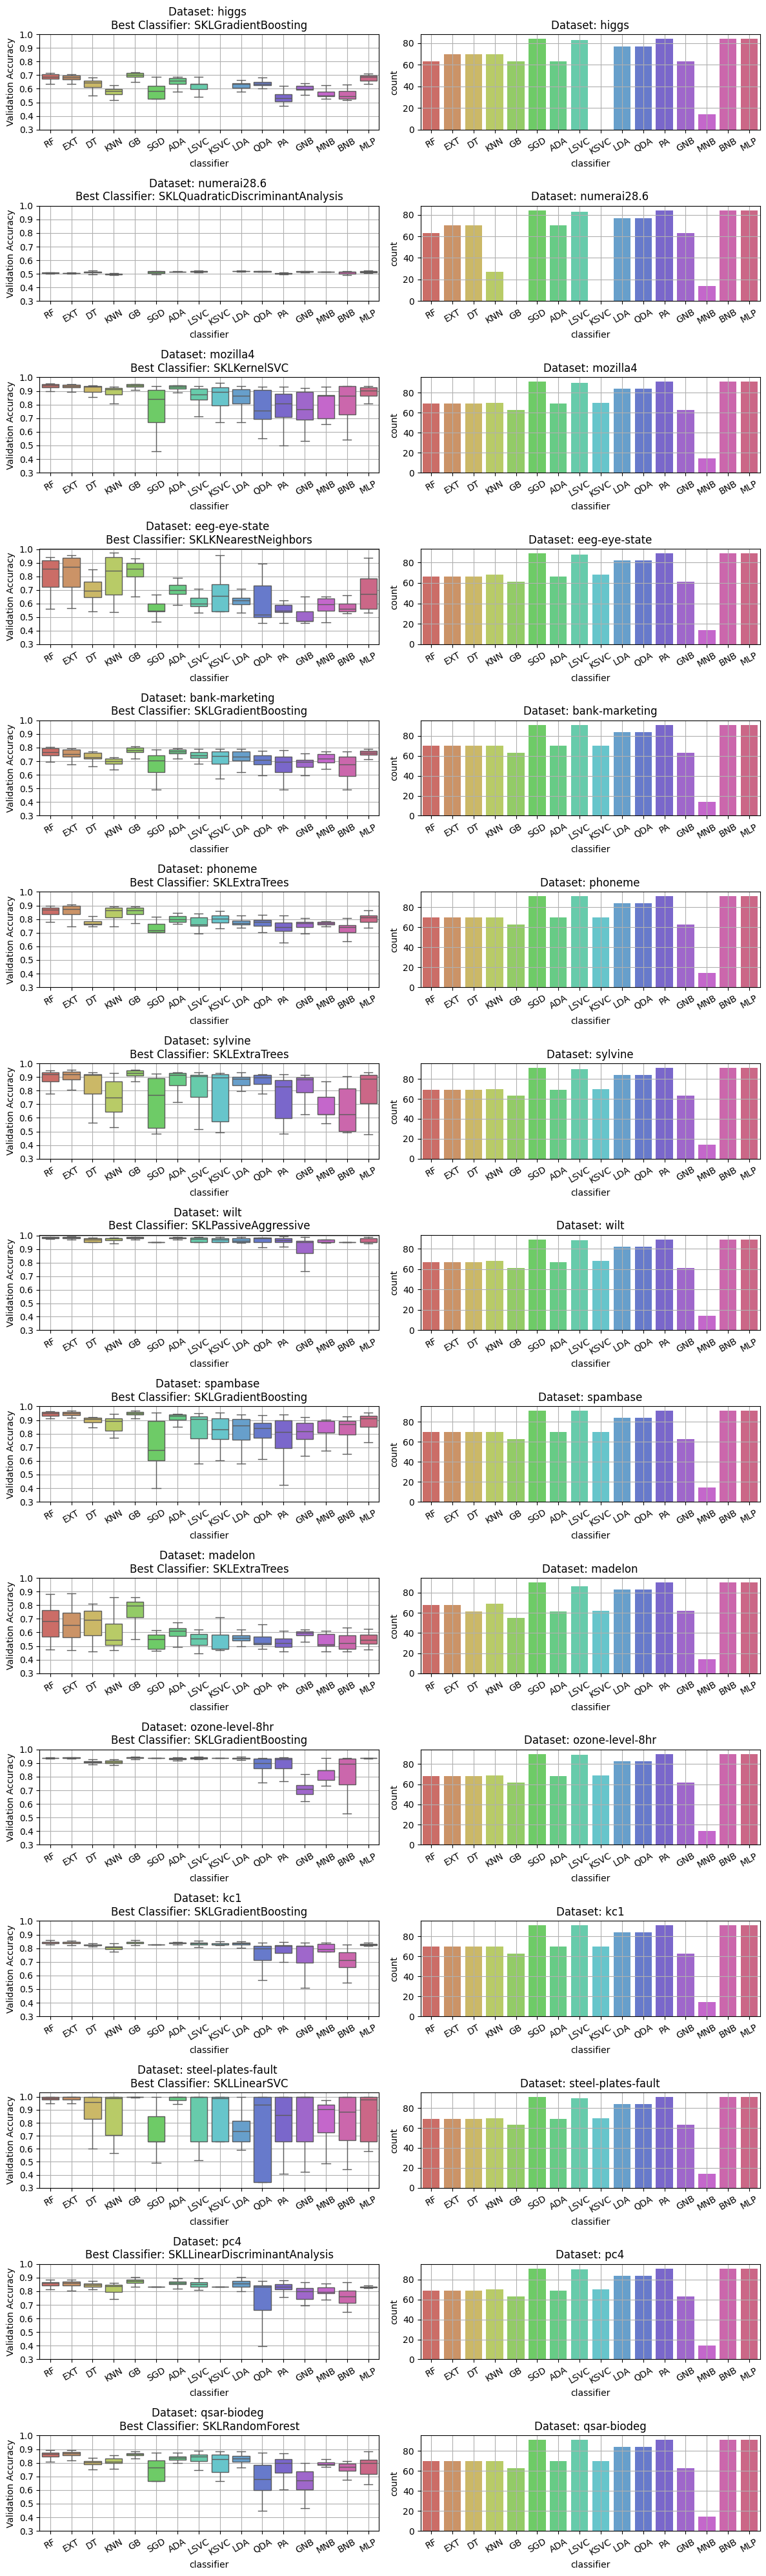

In [38]:
def plot_score_per_classifier_boxplot_cls_luigi(datasets, figsize=(12, 40), n_cols=2):
    figure, axes = plt.subplots(nrows=len(datasets), ncols=n_cols, figsize=figsize)
    
    n_colours = len(list(clf_short_names.values()))
    c_map = {}
    for ix, v in enumerate(clf_short_names.values()):
        c_map[v] = sns.color_palette("hls", n_colours)[ix]
    
    
    
    for ix, ds in enumerate(datasets):
        rh = pd.read_csv(f"binary_classfication_pipelines/run_histories/{ds}_train_run_history.csv")
        successful = rh[rh["status"] == "success"]
        
        best_clf = successful.loc[0, "classifier"]
                
        successful["classifier"] = successful["classifier"].map(clf_short_names)
      
        ax1 = sns.boxplot(data=successful, x="classifier", y="valid_accuracy", ax=axes[ix][0], palette=c_map, order=clf_short_names.values(), showfliers = False)
        ax2 = sns.countplot(x=successful["classifier"], ax=axes[ix][1], palette=c_map, order=clf_short_names.values())
        
        ax1.set_yticks([x / 100 for x in range(30, 110, 10)])
        ax1.set_ylabel("Validation Accuracy")
        
        ax1.set_title(f"Dataset: {ds} \nBest Classifier: {best_clf}")
        ax2.set_title(f"Dataset: {ds}")
        
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)
        
        ax1.grid()
        ax2.grid()


        
    # figure.autofmt_xdate(rotation=45)
    plt.tight_layout()
    plt.show()


plot_score_per_classifier_boxplot_cls_luigi(dataset_info.index)

In [39]:
def get_askl_run_history_df_and_best_pipeline(dataset_name):
    
    clf, feature_preprocessor, scaler, score  = [], [], [], []
    best_pipeline = []
    
    askl = load_askl_obj(dataset_name)
    best_pipeline_id = askl.leaderboard().index[0]
    test_scores = askl.cv_results_["mean_test_score"]
    
    configs = load_json(f"askl/results/{dataset_name}/smac3-output/run_42/runhistory.json")["configs"]
    
    
    for i, s in enumerate(test_scores):
        clf.append(configs[str(i+1)]["classifier:__choice__"])
        feature_preprocessor.append(configs[str(i+1)]["feature_preprocessor:__choice__"])
        scaler.append(configs[str(i+1)]["data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__"])
        score.append(s)
    
    best_pipeline.append(
        configs[str(best_pipeline_id - 1)]["classifier:__choice__"]
    )
    
    best_pipeline.append(
        configs[str(best_pipeline_id - 1)]["feature_preprocessor:__choice__"]
    )
    
    best_pipeline.append(
        configs[str(best_pipeline_id - 1)]["data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__"]
    )
    
        
    df = pd.DataFrame()
    df["Classifier"] = clf
    df["Feature Preprocessor"] = feature_preprocessor
    df["Scaler"] = scaler
    df["Score"] = score
    
    
    return df, best_pipeline

In [40]:
def plot_score_per_classifier_boxplot_askl(datasets, figsize=(12, 40), n_cols=2):
    figure, axes = plt.subplots(nrows=len(datasets), ncols=n_cols, figsize=figsize)
    
    n_colours = len(list(clf_short_names.values()))
    c_map = {}
    for ix, v in enumerate(clf_short_names.values()):
        c_map[v] = sns.color_palette("hls", n_colours)[ix]
    
    
    for ix, ds in enumerate(datasets):
        rh, best_pipeline = get_askl_run_history_df_and_best_pipeline(ds)

        successful = rh[rh["Score"] > 0]
        
        best_clf = askl_clf_short_names[best_pipeline[0]]
                
        successful["Classifier"] = successful["Classifier"].map(askl_clf_short_names)
      
        ax1 = sns.boxplot(data=successful, x="Classifier", y="Score", ax=axes[ix][0], palette=c_map, order=clf_short_names.values(), showfliers = False)
        ax2 = sns.countplot(x=successful["Classifier"], ax=axes[ix][1], palette=c_map, order=clf_short_names.values())
        
        ax1.set_yticks([x / 100 for x in range(30, 110, 10)])
        ax1.set_ylabel("Validation Accuracy")
        
        ax1.set_title(f"Dataset: {ds} \nBest Classifier: {best_clf}")
        ax2.set_title(f"Dataset: {ds}")
        
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)
        
        ax1.grid()
        ax2.grid()


        
    # figure.autofmt_xdate(rotation=45)
    plt.tight_layout()
    plt.show()


plot_score_per_classifier_boxplot_askl(dataset_info.index)

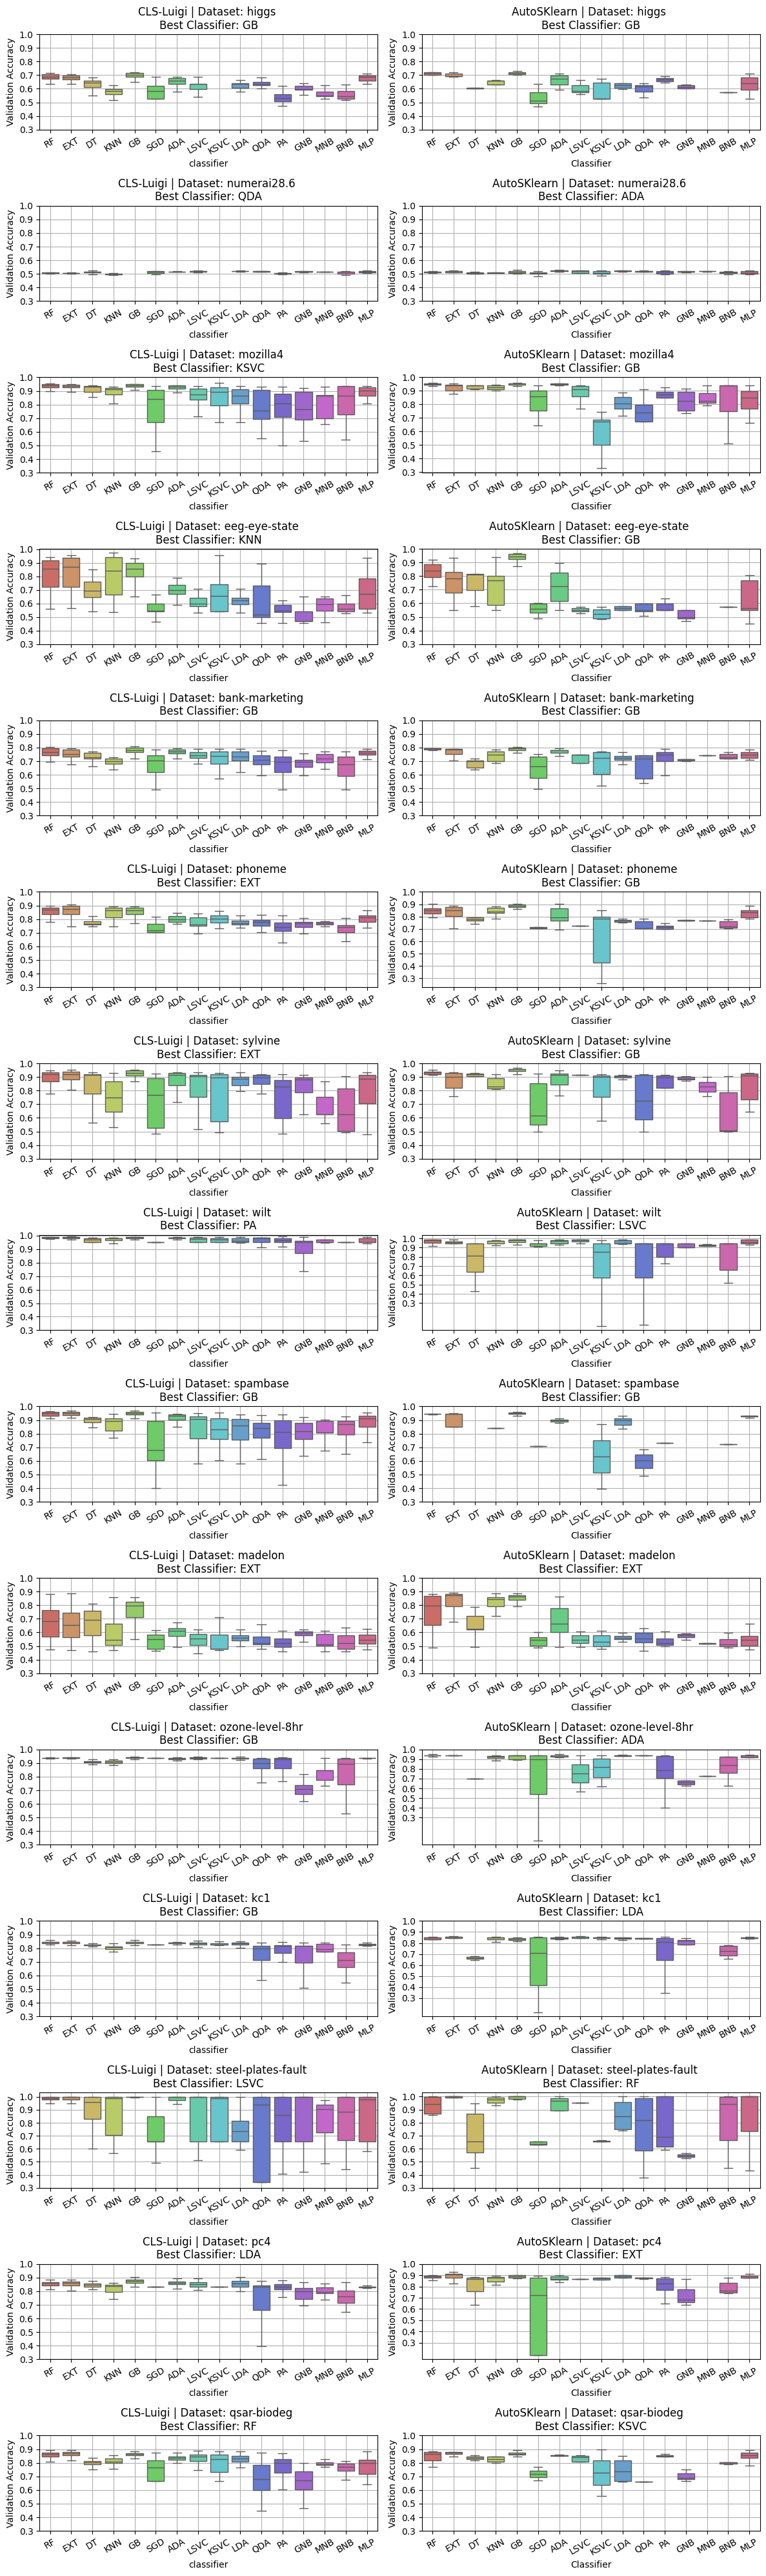

In [55]:
import numpy as np 
def plot_askl_and_cls_boxplot_scores(datasets, figsize=(12, 40), n_cols=2): 
    figure, axes = plt.subplots(nrows=len(datasets), ncols=n_cols, figsize=figsize)
    
    n_colours = len(list(clf_short_names.values()))
    c_map = {}
    for ix, v in enumerate(clf_short_names.values()):
        c_map[v] = sns.color_palette("hls", n_colours)[ix]
        
        
        
    for ix, ds in enumerate(datasets):
        # AutoSklearn
        rh, best_pipeline = get_askl_run_history_df_and_best_pipeline(ds)
        successful = rh[rh["Score"] > 0]
        best_clf = askl_clf_short_names[best_pipeline[0]]
        successful["Classifier"] = successful["Classifier"].map(askl_clf_short_names)
      
        ax1 = sns.boxplot(data=successful, x="Classifier", y="Score", ax=axes[ix][1], palette=c_map, order=clf_short_names.values(), showfliers = False)        
        ax1.set_yticks([x / 100 for x in range(30, 110, 10)])
        ax1.set_ylabel("Validation Accuracy")
        ax1.set_title(f"AutoSKlearn | Dataset: {ds} \nBest Classifier: {best_clf}")
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
        ax1.grid()
        
        
        # CLS-Luigi
        
        rh = pd.read_csv(f"binary_classfication_pipelines/run_histories/{ds}_train_run_history.csv")
        successful = rh[rh["status"] == "success"]
        best_clf = clf_short_names[successful.loc[0, "classifier"]]
        successful["classifier"] = successful["classifier"].map(clf_short_names)
        ax2 = sns.boxplot(data=successful, x="classifier", y="valid_accuracy", ax=axes[ix][0], palette=c_map, order=clf_short_names.values(), showfliers = False)
        
        ax2.set_yticks([x / 100 for x in range(30, 110, 10)])
        ax2.set_ylabel("Validation Accuracy")
        
        ax2.set_title(f"CLS-Luigi | Dataset: {ds} \nBest Classifier: {best_clf}")
        
        ax2.set_xticklabels(ax1.get_xticklabels(), rotation=30)
        ax2.grid()

    plt.tight_layout()
    plt.show()


plot_askl_and_cls_boxplot_scores(dataset_info.index)

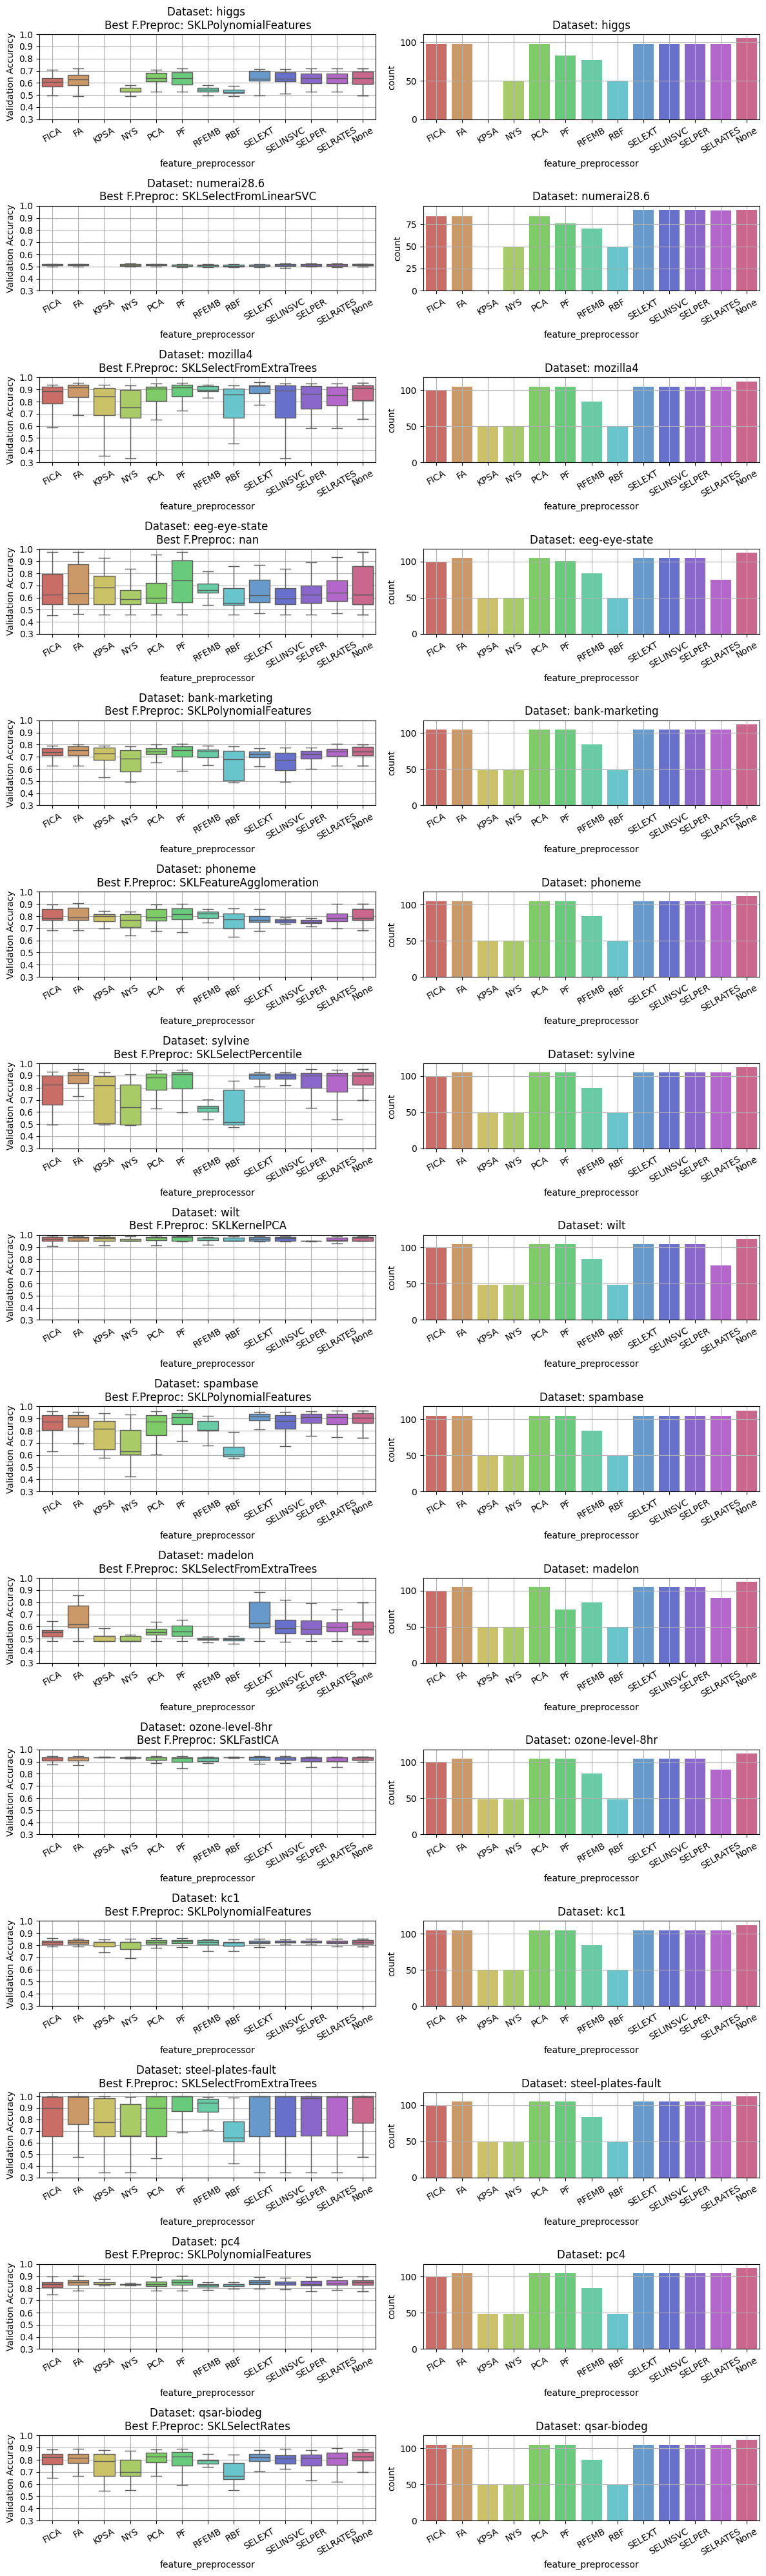

In [56]:
fpp = {    
    "SKLFastICA": "FICA",
    "SKLFeatureAgglomeration": "FA",
    "SKLKernelPCA": "KPSA",
    "SKLNystroem": "NYS",
    "SKLPCA": "PCA",
    "SKLPolynomialFeatures" :"PF",
    "SKLRandomTreesEmbedding": "RFEMB",
    "SKLRBFSampler": "RBF",
    "SKLSelectFromExtraTrees": "SELEXT",
    "SKLSelectFromLinearSVC" : "SELINSVC",
    "SKLSelectPercentile": "SELPER",
    "SKLSelectRates": "SELRATES",
    None: "None",
    np.nan: "None"
    }

def plot_score_per_classifier_boxplot_cls_luigi(datasets, figsize=(12, 40), n_cols=2):
    figure, axes = plt.subplots(nrows=len(datasets), ncols=n_cols, figsize=figsize)
    
    n_colours = len(list(fpp.values()))
    c_map = {}
    for ix, v in enumerate(fpp.values()):
        c_map[v] = sns.color_palette("hls", n_colours)[ix]
    
    
    
    for ix, ds in enumerate(datasets):
        rh = pd.read_csv(f"binary_classfication_pipelines/run_histories/{ds}_train_run_history.csv")
        successful = rh[rh["status"] == "success"]
        
        best_clf = successful.loc[0, "feature_preprocessor"]
                
        successful["feature_preprocessor"] = successful["feature_preprocessor"].map(fpp)
      
        ax1 = sns.boxplot(data=successful, x="feature_preprocessor", y="valid_accuracy", ax=axes[ix][0], palette=c_map, order=fpp.values(), showfliers = False)
        ax2 = sns.countplot(x=successful["feature_preprocessor"], ax=axes[ix][1], palette=c_map, order=fpp.values())
        
        ax1.set_yticks([x / 100 for x in range(30, 110, 10)])
        ax1.set_ylabel("Validation Accuracy")
        
        ax1.set_title(f"Dataset: {ds} \nBest F.Preproc: {best_clf}")
        ax2.set_title(f"Dataset: {ds}")
        
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)
        
        ax1.grid()
        ax2.grid()


        
    # figure.autofmt_xdate(rotation=45)
    plt.tight_layout()
    plt.show()


plot_score_per_classifier_boxplot_cls_luigi(dataset_info.index)